# Playbook of Plots


* Countplot 
* Line
* Scatter 
* Error 
* Boxplot / Violin
* histogram / density
* StackedBar 
* span bar
* marimekko 
* Heatmap
* tree plot
* word cloud
* chord diagram / arc diagram
* bubble
* parallel coordinates
* Correlogram

https://github.com/spotify/chartify?utm_source=mybridge&utm_medium=blog&utm_campaign=read_more


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import bokeh
import plotly

In [2]:
df = pd.read_csv('gs://marketprice/renov/bain/sp1/ds/201803_201806/initial/predict_dates_2018-03-01_2018-06-01000000000000.csv')

In [3]:
df.head()

,IDC_AVAL_RISCO,MUDANCA_RISCO,COD_CLASSE_BONUS,CATEGORIA,F_CAPITAL,REGIONAL,IDC_18_24ANOS_FINAL,COD_REGIAO_POLITICA,COD_TIPO_VEICULO,DSC_ABREV_SEGRA,...,SOMA_PERIODO,RAZAO_C,SP_RENOV,QTD_IDADE_VEICULO,PREM_EMITIDO_ANUAL,SP_INICIAL,QTD_SIN_TOTAL,LMR_CASCO,QTD_PROP,DAT_FIM_VIGENCIA
0,2,00. SEM MUDANCA RISCO,10,10,0,Regional SP INT,01.SIM,320,7,LIBERTY,...,0,0.18,0.6097,6.0,1053.94,0.7195,0,24039.0,1,2018-06-18
1,2,00. SEM MUDANCA RISCO,9,11,0,Regional SP,02.NAO,376,7,AZUL,...,0,-0.16,0.6442,6.0,2297.79,0.5437,0,33598.0,0,2018-07-26
2,2,00. SEM MUDANCA RISCO,7,11,1,Regional C/O,01.SIM,78,7,ALFA,...,0,0.26,0.4858,7.0,3227.13,0.6111,1,32846.0,1,2018-03-29
3,2,00. SEM MUDANCA RISCO,10,11,0,Regional SUL,02.NAO,269,7,AZUL,...,0,0.16,0.7423,7.0,1490.99,0.8615,0,32758.0,1,2018-04-12
4,2,01. RISCO MAIOR,0,11,0,Regional SUL,02.NAO,187,7,ZZ - SEM SEGRA ANTERIOR,...,0,0.59,0.5507,5.0,3149.64,0.8769,0,45289.0,0,2018-05-08


### Countplot

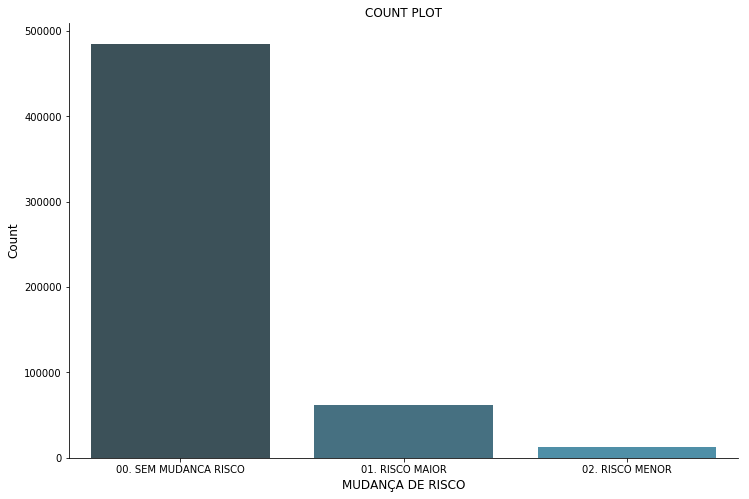

In [4]:
plt.rcParams['figure.figsize'] = (12, 8)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

sns.countplot('MUDANCA_RISCO', data=df, palette = sns.color_palette('GnBu_d'))
plt.xlabel('MUDANÇA DE RISCO', size = 12)
plt.ylabel('Count', size = 12)
a = plt.title('COUNT PLOT')

### Distplot

In [ ]:
sns.distplot(data['Annual Income (k$)'])

### Mekko Chart

In [2]:
# -*- coding: utf-8 -*-

# -----------------------------------------------------------------------------------------------
# LIBRARIES
# -----------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import colorsys
from math import floor
from matplotlib import rcParams
from pylab import *
import fractions

# -----------------------------------------------------------------------------------------------
# FUNCTIONS
# colormaps here -> http://matplotlib.org/examples/color/colormaps_reference.html )
# -----------------------------------------------------------------------------------------------


def floored_percentage(val, digits):
    val *= 10 ** (digits + 2)
    return '{1:.{0}f}%'.format(digits, floor(val) / 10 ** digits)


def ColourList(num_colors):
    cm = get_cmap('Blues') # change the value in quotes to the desired color map
    clist = [cm(1.*i/num_colors) for i in range(num_colors)]

    # # Test
    # for i in range(num_colors):
    #     print 1.*i/num_colors 

    return clist


def mekko (data, level1, level2, kpi, kpiColor):


    # 1. Get the color shading
    dfColor = data[[level1, level2, kpiColor]] # Eliminate unnecessary columns if any

    dfColor = dfColor.fillna(0) # Fill blanks with zeroes
    
    dfColor = dfColor.convert_objects(convert_numeric=True) # Convert to numeric, because the data is stored as something else

    dfColor[[kpiColor]] = dfColor[[kpiColor]].astype(int) # Convert floats to integers, necessary to get the color map
    
    # # TEST
    # print dfColor.dtypes

    ncolors = int(dfColor[kpiColor].max() - dfColor[kpiColor].min()) #get the number of colours
    
    maxColor = dfColor[kpiColor].max() # Maximum value of the colour kpi, will be used later

    # # TEST
    # print dfColor[kpiColor].max(), dfColor[kpiColor].min(), ncolors

    valList = dfColor[kpiColor].values.tolist() # Store as list
    
    if 0 in valList:
        colorlist = ColourList(ncolors+1) 

    else:
        colorlist = ColourList(ncolors+2)
        valList.append(0) # zero needs to be there

    valList.sort() # Sort the list, so the zero is in the right place
    
    # # TEST
    # print len(valList) == len(colorlist), len(valList), len(colorlist)

    #colReference = range(dfColor[kpiColor].min(), (dfColor[kpiColor].max()+1)) # Get the range of all possible values associated to colours
    colReference = list(range(dfColor[kpiColor].min(), (dfColor[kpiColor].max()+1))) # Get the range of all possible values associated to colours

    if 0 not in colReference:
        colReference.append(0)
    colReference.sort()
    
    # # TEST
    #print len(colReference) == len(colorlist)
    
    referenceDict = dict(zip(colReference, colorlist))

    dfColor = dfColor.pivot(index=level1, columns=level2, values=kpiColor) #.reset_index()

    dfColor =dfColor.fillna(0)

    dfColor = dfColor.applymap(lambda x: referenceDict[x])

    df = data[[level1, level2, kpi]]
    
    df.loc[:, kpi] = df.loc[:,kpi].convert_objects(convert_numeric=True)
    
    # # TEST
    # print df.dtypes

    total = sum(df[kpi])

    dfCat = df[[level1, kpi]]

    dfCat = dfCat.groupby([level1]).sum()

    dfCatTotals = dfCat

    dfCat = dfCat.applymap(lambda x: (x/total))

    dfCat = dfCat.rename(columns = {kpi: "Width"})

    dfCat = dfCat.reset_index()

    widths = dfCat['Width'].tolist()

    df = df.pivot(index=level1, columns=level2, values=kpi) #.reset_index()

    df = df.fillna(0)

    df = df.apply(lambda x : x / x.sum(), axis=1)   
    
    pos = [0]
    cumulative = 0

    for i in widths[:-1]:
        cumulative += i
        pos.append(cumulative)
   
    counter = 0
    
    xticks = []

    bottoms = [0 for i in range(len(dfCat[level1]))]
   
    fig, axes = plt.subplots()
    
    # Change title as desired; use the version above if you don't have python3
    # plt.title(kpi+" (tot. "+"{0:,.2f}".format(float(dfCatTotals.sum()))+("€").decode('utf-8')+"), darkest shading = max "+kpiColor+" ("+"{0:,.2f}".format(float(maxColor))+")", y = 1.02, size = "medium")
    plt.title(kpi+" (tot. "+"{0:,.2f}".format(float(dfCatTotals.sum()))+("€")+"), darkest shading = max "+kpiColor+" ("+"{0:,.2f}".format(float(maxColor))+")", y = 1.02, size = "medium")

    axes.get_yaxis().set_visible(False)
    axes.set_ylim([0,1])
    
    axes.set_xlim([0,sum(widths)])

    fig.set_size_inches(20,10)
    plt.subplots_adjust(bottom=0.15, top = 0.95)

    for pl in range(len(df.columns)):

        for cat in range(len(dfCat[level1])):

            position = pos[cat]
            width = widths[cat]
            height = df.iat[cat, pl]
            bottom = bottoms[cat]
            color = dfColor.iat[cat,pl]

            # if cat == 1:
            #     print width, height

            xticks.append(position + width/2)

            plt.bar(left = position, height = height, width = width, bottom = bottom, color = color)
            
            if height > 0.05 and width > 0.05:
                textsize =  'medium'
            else:
                textsize = "x-small"

            if height > 0.01 and width > 0.01:
                plt.text(position + width/2, bottom + height/2, df.columns[pl]+"\n"+ floored_percentage(height, 0), ha='center', size = textsize, va = "center")

            bottoms[cat] += height
    
    # Change if necessary; use version above if you don't have python3
    # plt.xticks(xticks, [str.split(u)[0].decode('utf-8')+" - "+"{0:,.2f}".format(float(dfCatTotals.loc[u]))+("€").decode('utf-8') for u in dfCat[level1].tolist()], rotation='vertical', size = "x-small")
    plt.xticks(xticks, [str.split(u)[0]+" - "+"{0:,.2f}".format(float(dfCatTotals.loc[u]))+("€") for u in dfCat[level1].tolist()], rotation='vertical', size = "x-small")

    fig.savefig(kpi+".png", dpi = 100)

    # plt.show()

    plt.clf()



In [ ]:
import mekko 
import pandas as pd

# -----------------------------------------------------------------------------------------------
# GET THE DATA
# Data needs to have this structure: First row label| Second row label |some columns of kpis to plot, choose one at a time|a column for the colour kpi
# -----------------------------------------------------------------------------------------------

data = pd.io.parsers.read_csv("data.csv", dtype = object) # insert file path

# -----------------------------------------------------------------------------------------------
# SET THE VARIABLES
# Make sure that the variables correspond to the right column names
# -----------------------------------------------------------------------------------------------

level1 = "Ice cream type"
level2 = "Flavour"

kpi = "Revenues" #Insert the kpi (column title) corresponding to the height of the boxes

kpiColor = "Quantity sold" # Insert the kpi (column title) corresponding to the colour shading


# -----------------------------------------------------------------------------------------------
# EXECUTE
# -----------------------------------------------------------------------------------------------

mekko.mekko(data = data, level1 = level1, level2 = level2, kpi = kpi, kpiColor = kpiColor)

In [1]:
import matplotlib

In [3]:
matplotlib.colors.DivergingNorm()

AttributeError: module 'matplotlib.colors' has no attribute 'DivergingNorm'

### Word Cloud

In [ ]:
#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))

### Radar Chart

In [ ]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)
        
        
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 
        

### Andrews Chart

In [ ]:
from pandas import plotting

plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

## Plotly

Install: https://plot.ly/python/getting-started/#jupyterlab-support-python-35

In [3]:
# import plotly.graph_objects as go
# fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
# fig.show()

In [ ]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [ ]:
# importing the dataset
data = pd.read_csv('../input/Mall_Customers.csv')

dat = ff.create_table(data.head())

py.iplot(dat)

In [ ]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [ ]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [ ]:
import plotly.graph_objs as go

df1 = mall_customer[mall_customer.Gender == 'Male']
df2 = mall_customer[mall_customer.Gender == 'Female']
male_age =  df1.Age 
male_income = df1['Annual Income (k$)']
male_score = df1['Spending Score (1-100)']
female_age = df2.Age
female_income = df2['Annual Income (k$)']
female_score = df2['Spending Score (1-100)']
    
trace1 = {
  'x' : female_age,
  'y' : female_income,
  'name' : 'income',
  'type' : 'bar'
};
trace2 = {
  'x' : female_age,
  'y' : female_score,
  'name' : 'score',
  'type' : 'bar'
};

data = [trace1,trace2];
layout = {
    'xaxis' : {'title':'age'},
    'barmode' : 'relative',
    'title' : 'skore and income for female customer'
}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
mall = mall_customer.iloc[:,2:]
import plotly.figure_factory as ff
mall['index'] = np.arange(1,len(mall)+1)
fig = ff.create_scatterplotmatrix(mall, diag ='box', index = 'index' , colormap =['rgb(10, 10, 255)', '#F0963C', 'rgb(51, 255, 153)'],
                                 colormap_type = 'seq', height = 700, width = 700)
iplot(fig)

## Bokeh 

In [ ]:
## asas

## Facets

In [ ]:
# asdas